In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Load the dataset
file_path = r"C:\Users\Suraj Sharma\Desktop\New folder (2)\creditcard.csv"
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Further reduce the size of the dataset for hyperparameter tuning
X_train_smote_sample, _, y_train_smote_sample, _ = train_test_split(X_train_smote, y_train_smote, test_size=0.8, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_smote_sample = scaler.fit_transform(X_train_smote_sample)
X_test = scaler.transform(X_test)

# Logistic Regression with RandomizedSearchCV
log_reg = LogisticRegression()
param_distributions_log_reg = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
random_search_log_reg = RandomizedSearchCV(log_reg, param_distributions_log_reg, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_log_reg.fit(X_train_smote_sample, y_train_smote_sample)
best_log_reg = random_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Best Logistic Regression Report:\n", report_log_reg)

# Random Forest with RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
param_distributions_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 6, None],
    'criterion': ['gini', 'entropy']
}
random_search_rf = RandomizedSearchCV(rf, param_distributions_rf, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_smote_sample, y_train_smote_sample)
best_rf = random_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
report_best_rf = classification_report(y_test, y_pred_best_rf)
print("Best Random Forest Report:\n", report_best_rf)

# Gradient Boosting with RandomizedSearchCV
gb = GradientBoostingClassifier(random_state=42)
param_distributions_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
random_search_gb = RandomizedSearchCV(gb, param_distributions_gb, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_gb.fit(X_train_smote_sample, y_train_smote_sample)
best_gb = random_search_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)
report_best_gb = classification_report(y_test, y_pred_best_gb)
print("Best Gradient Boosting Report:\n", report_best_gb)


Best Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.85      0.26       148

    accuracy                           0.99     85443
   macro avg       0.58      0.92      0.63     85443
weighted avg       1.00      0.99      0.99     85443



C:\Users\Suraj Sharma\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.64      0.84      0.73       148

    accuracy                           1.00     85443
   macro avg       0.82      0.92      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Best Gradient Boosting Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.41      0.85      0.55       148

    accuracy                           1.00     85443
   macro avg       0.71      0.92      0.78     85443
weighted avg       1.00      1.00      1.00     85443



Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Basic statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75% 

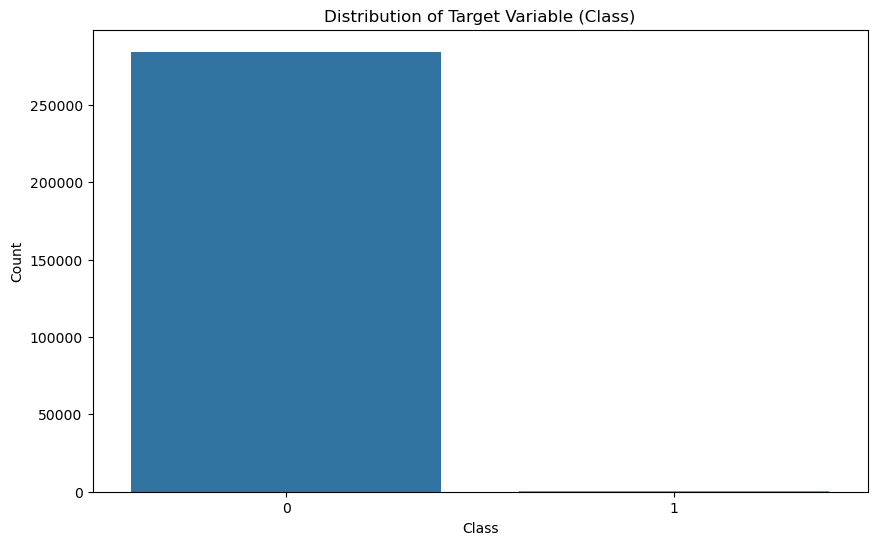

C:\Users\Suraj Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suraj Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


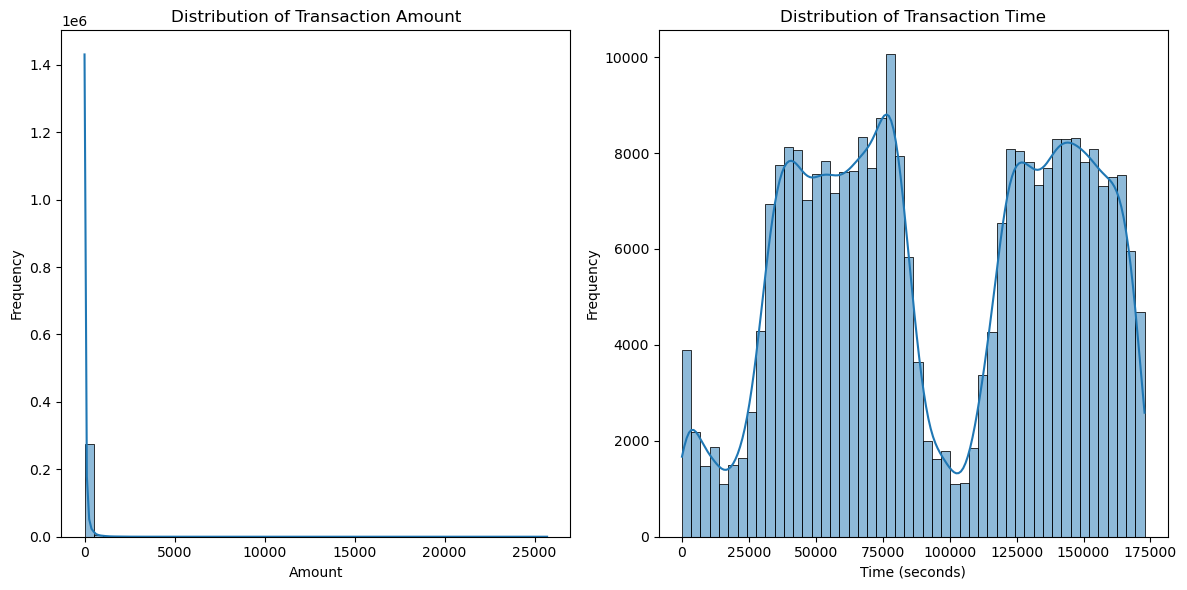

Distribution after balancing:
 Class
1    284315
0    284315
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE

# Load the dataset
file_path =r"C:\Users\Suraj Sharma\Desktop\New folder (2)\creditcard.csv"
data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Basic statistics
print("Basic statistics:\n", data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Amount and Time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Data Cleaning (There are no missing values in this dataset)
# Balancing the data
majority_class = data[data['Class'] == 0]
minority_class = data[data['Class'] == 1]

# Over-sample the minority class
minority_class_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)

# Combine the majority class with the oversampled minority class
balanced_data = pd.concat([majority_class, minority_class_oversampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the distribution of the target variable after over-sampling
print("Distribution after balancing:\n", balanced_data['Class'].value_counts())

# Feature Engineering
# Standardize the Amount and Time features
scaler = StandardScaler()
balanced_data[['Amount', 'Time']] = scaler.fit_transform(balanced_data[['Amount', 'Time']])

# Creating interaction features
balanced_data['V1_V2'] = balanced_data['V1'] * balanced_data['V2']
balanced_data['V3_V4'] = balanced_data['V3'] * balanced_data['V4']

# Feature Selection using RFE
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=20)

# Fit RFE
rfe = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:\n", selected_features)

# Use only the selected features
X_selected = balanced_data[selected_features]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Model Training
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n {classification_report}')

